# Business Questions about JobSatisfaction:
### 1) What about the JobSatisfaction by Gender?
### 2) Does Salary have an influence on JobSatisfation?
### 3) Does HoursPerWeek have an impact on JobSaticfation?

In [117]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df = pd.read_csv('survey-results-public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
def prepare_df(df, cols_to_keep):
    '''
    INPUT
    df - pandas dataframe
    cols_to_keep - list of columns you want to consider in yout dataframe
    
    OUTPUT
    df_clean - A dataframe holding all columns yo want to consider
    
    This function cleans df using the folowing steps:
    1. Drop all columns except the cols_to_keep
    2. Drop all rows with NAN-Values
    '''
    
    #1. Drop all columns except the cols_to_keep
    df = df[cols_to_keep]
    
    #2. Drop all rows with NAN-Values
    df = df.dropna()
    
    return df

> First create a picture for the article to get the readers attention.

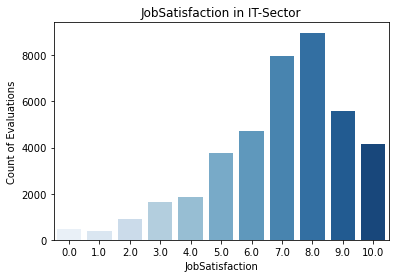

In [155]:
df_pic = prepare_df(df, ['JobSatisfaction'])
sb.countplot(data=df_pic, x='JobSatisfaction', palette='Blues')
plt.title("JobSatisfaction in IT-Sector")
plt.ylabel("Count of Evaluations");

### 1) What about the JobSatisfaction by Gender?
> After dropping the na-values the dataset contains a lot of rows (29015), so it would be appropriate to not impute <br>the JobSatisfaction column and apply the prepare_df function to do so.

In [73]:
cols_to_keep = ['JobSatisfaction', 'Gender']
df_gender = prepare_df(df, cols_to_keep)
df_gender

,JobSatisfaction,Gender
2,9.0,Male
3,3.0,Male
6,6.0,Male
7,7.0,Male
8,6.0,Male
...,...,...
51385,7.0,Female
51386,4.0,Male
51387,3.0,Male
51390,7.0,Male


> Check the values of the Gender column shows that we have to clean the column.

In [74]:
df_gender['Gender'].value_counts()

Male                                                       26306
Female                                                      2130
Other                                                        141
Male; Other                                                  128
Gender non-conforming                                        102
Male; Gender non-conforming                                   47
Transgender                                                   39
Female; Transgender                                           34
Female; Gender non-conforming                                 24
Male; Female                                                  12
Male; Female; Transgender; Gender non-conforming; Other       11
Transgender; Gender non-conforming                            10
Male; Transgender                                              7
Female; Transgender; Gender non-conforming                     6
Male; Female; Transgender; Gender non-conforming               4
Male; Female; Transgender

> Every row which contains "Transgender" should become "Transgender".

In [75]:
gender = df_gender['Gender'].unique()

to_replace = []

for i in gender:
    if i.find("Transgender") == -1:
        continue
    else:
        to_replace.append(i)
        
df_gender['Gender'].replace(to_replace, value='Transgender', inplace=True)
df_gender['Gender'].value_counts()

Male                                  26306
Female                                 2130
Other                                   141
Male; Other                             128
Transgender                             119
Gender non-conforming                   102
Male; Gender non-conforming              47
Female; Gender non-conforming            24
Male; Female                             12
Male; Female; Other                       2
Gender non-conforming; Other              2
Male; Gender non-conforming; Other        2
Name: Gender, dtype: int64

> Only keep Female, Male, Transgender.

In [76]:
df_gender = df_gender.query('Gender in ["Female", "Male", "Transgender"]')
df_gender['Gender'].value_counts()

Male           26306
Female          2130
Transgender      119
Name: Gender, dtype: int64

In [84]:
df_gender_mean = df_gender.groupby('Gender', as_index=False).mean()
df_gender_mean

,Gender,JobSatisfaction
0,Female,6.936620
1,Male,7.004372
2,Transgender,6.672269


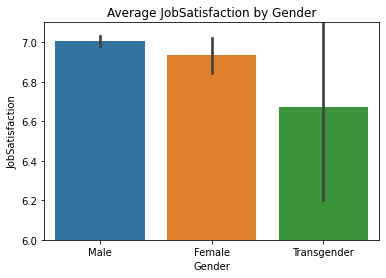

In [153]:
sb.barplot(data=df_gender, x='Gender', y='JobSatisfaction')
plt.title("Average JobSatisfaction by Gender")
plt.ylabel("JobSatisfaction")
plt.ylim(6, 7.1);

### 2) Does Salary have an influence on JobSatisfation?
> After dropping the na-values the dataset contains a lot of rows (12852), so it would be appropriate to not impute <br> the columns and apply the prepare_df function to do so.

In [124]:
cols_to_keep = ['JobSatisfaction', 'Salary']
df_salary = prepare_df(df, cols_to_keep)
df_salary

,JobSatisfaction,Salary
2,9.0,113750.000000
14,8.0,100000.000000
17,8.0,130000.000000
18,3.0,82500.000000
22,9.0,100764.000000
...,...,...
51371,7.0,74193.548387
51378,10.0,107526.881720
51382,5.0,32258.064516
51387,3.0,58000.000000


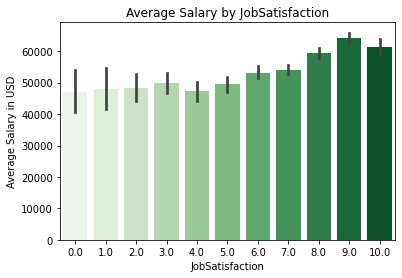

In [123]:
sb.barplot(data=df_salary, x='JobSatisfaction', y='Salary', palette='Greens')
plt.title("Average Salary by JobSatisfaction")
plt.ylabel("Average Salary in USD");

### 3) Does HoursPerWeek have an impact on JobSaticfation?
> After dropping the na-values the dataset contains a lot of rows (16508), so it would be appropriate to not impute <br> the columns and apply the prepare_df function to do so.


In [129]:
cols_to_keep = ['JobSatisfaction', 'HoursPerWeek']
df_hours = prepare_df(df, cols_to_keep)
df_hours

,JobSatisfaction,HoursPerWeek
3,3.0,5.0
6,6.0,1.0
7,7.0,1.0
8,6.0,2.0
9,8.0,1.0
...,...,...
51385,7.0,4.0
51386,4.0,2.0
51387,3.0,5.0
51390,7.0,1.0


> Drop HoursPerWeek = 0 for only recognizing people who are working.

In [133]:
df_hours = df_hours.query('HoursPerWeek != 0')
df_hours['HoursPerWeek'].value_counts()

1.0     5083
2.0     2452
3.0      972
4.0      869
5.0      736
40.0     378
10.0     366
6.0      316
8.0      231
7.0      175
20.0     131
12.0      79
15.0      73
9.0       63
14.0      38
11.0      37
35.0      26
19.0      22
16.0      22
30.0      21
13.0      20
18.0      17
21.0      17
38.0      14
24.0      14
25.0      14
17.0      14
39.0      13
37.0      12
22.0      11
36.0      10
32.0       8
27.0       8
23.0       7
26.0       5
34.0       5
28.0       4
33.0       3
29.0       2
31.0       1
Name: HoursPerWeek, dtype: int64

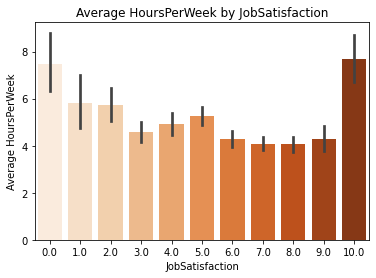

In [134]:
sb.barplot(data=df_hours, x='JobSatisfaction', y='HoursPerWeek', palette='Oranges')
plt.title("Average HoursPerWeek by JobSatisfaction")
plt.ylabel("Average HoursPerWeek");